# Classification Algorithms in Machine Learning

1. Logistic Regression

  📌 The aim is to establish a linear model for the classification problem that describes the relationship between dependent and independent variables.

2. Naive Bayes

  📌 It is a probability-based modeling technique. The aim is to calculate the probability that a particular sample belongs to each class, based on conditional probability.

3. k-Nearest Neighbors(KNN)

  📌 Predicts are made based on observation similarity

4. Support Vector Classification(SVC) ===> Linear & RBF

  📌 The goal is to find the hyperplane that will allow the separation between the two classes to be optimal.

5. Artificial Neural Network(ANN)

  📌 It is one of the powerful machine learning algorithms that can be used for classification and regression problems that refer to the way the human brain processes information

6. Classification and Regression Trees(CART)

  📌 The aim is to transform the complex structures in the data set into simple decision structures.

7. Random Forests(RF)

  📌 It is based on the evaluation of the predictions produced by multiple decision trees.

8. Gradient Boosting Machines(GBM)

  📌 It is a generalized version of AdaBoost that can be easily adapted to classification and regression problems. A series of models in the form of a single predictive model are constructed on the residuals.

9. Extreme Gradient Boosting(XGBoost)

  📌 XGBoost is optimized to increase the speed and prediction performance of GBM. It is scalable and can be integrated into different platforms.

10. LightGBM

  📌 LightGBM is another type of GBM developed to increase the training time performance of XGBoost.

11. Category Boosting(CatBoost)

  📌 It is another fast, successful type of GBM that can automatically deal with categorical variables.

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.0 MB/s eta 0:00:00


## Import Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


## General Information About to the Dataset


In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1
######################### Tail #########################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63    

## Analysis of Categorical and Numerical Variables


In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 768
Variables: 9
Cat_cols: 1
Num_cols: 8
Cat_but_car: 0


In [7]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [8]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   Outcome  Ration
0      500 65.1042
1      268 34.8958
##########################################


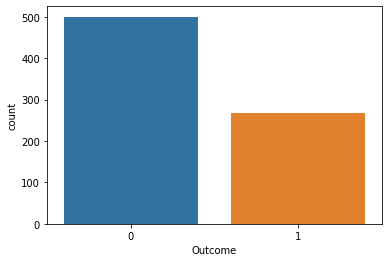

In [9]:
cat_summary_df(df)

In [10]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [11]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   768.0000
mean      3.8451
std       3.3696
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
max      17.0000
Name: Pregnancies, dtype: float64


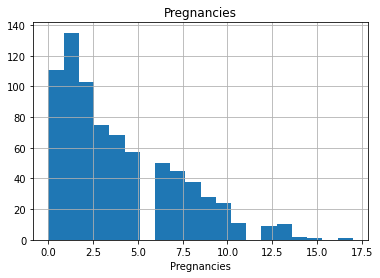

count   768.0000
mean    120.8945
std      31.9726
min       0.0000
1%       57.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
max     199.0000
Name: Glucose, dtype: float64


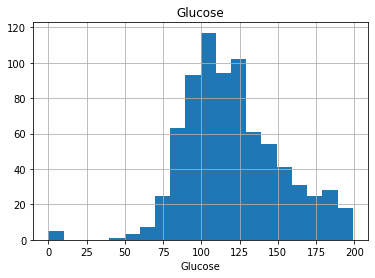

count   768.0000
mean     69.1055
std      19.3558
min       0.0000
1%        0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
max     122.0000
Name: BloodPressure, dtype: float64


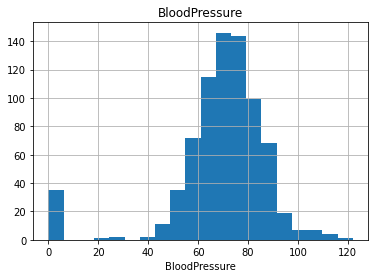

count   768.0000
mean     20.5365
std      15.9522
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
max      99.0000
Name: SkinThickness, dtype: float64


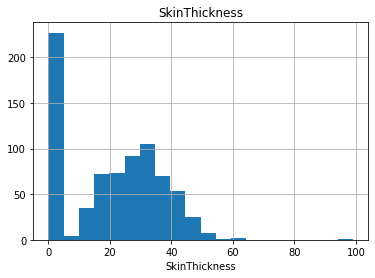

count   768.0000
mean     79.7995
std     115.2440
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
max     846.0000
Name: Insulin, dtype: float64


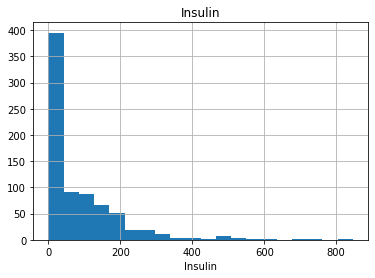

count   768.0000
mean     31.9926
std       7.8842
min       0.0000
1%        0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
max      67.1000
Name: BMI, dtype: float64


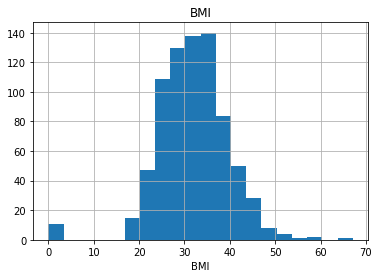

count   768.0000
mean      0.4719
std       0.3313
min       0.0780
1%        0.0947
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


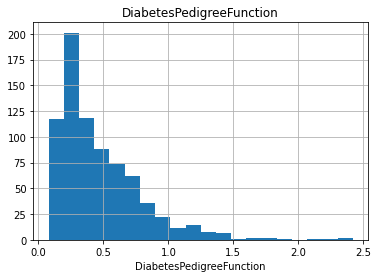

count   768.0000
mean     33.2409
std      11.7602
min      21.0000
1%       21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
max      81.0000
Name: Age, dtype: float64


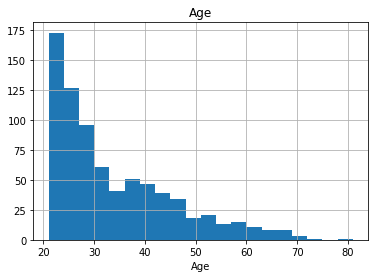

In [12]:
num_summary_df(df)

In [13]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [14]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [15]:
target_summary_with_num_df(df, "Outcome")

         Pregnancies
Outcome             
0             3.2980
1             4.8657
#############################################
         Glucose
Outcome         
0       109.9800
1       141.2575
#############################################
         BloodPressure
Outcome               
0              68.1840
1              70.8246
#############################################
         SkinThickness
Outcome               
0              19.6640
1              22.1642
#############################################
         Insulin
Outcome         
0        68.7920
1       100.3358
#############################################
            BMI
Outcome        
0       30.3042
1       35.1425
#############################################
         DiabetesPedigreeFunction
Outcome                          
0                          0.4297
1                          0.5505
#############################################
            Age
Outcome        
0       31.1900
1       37.0672
##########

## Correlation Analysis

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.2219
Glucose,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.4666
BloodPressure,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.0651
SkinThickness,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0748
Insulin,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.1305
BMI,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2927
DiabetesPedigreeFunction,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1738
Age,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2384
Outcome,0.2219,0.4666,0.0651,0.0748,0.1305,0.2927,0.1738,0.2384,1.0000


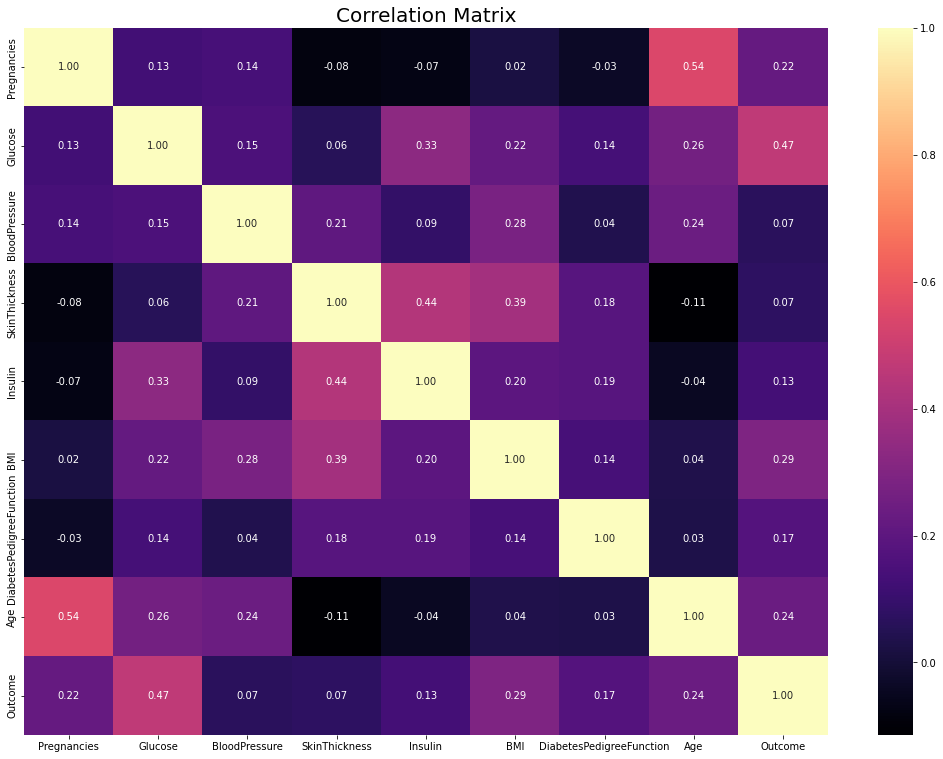

In [17]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

<ipython-input-18-dcff60c12093>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


############## After Correlation Analysis, You Don't Need to Remove Variables ##############


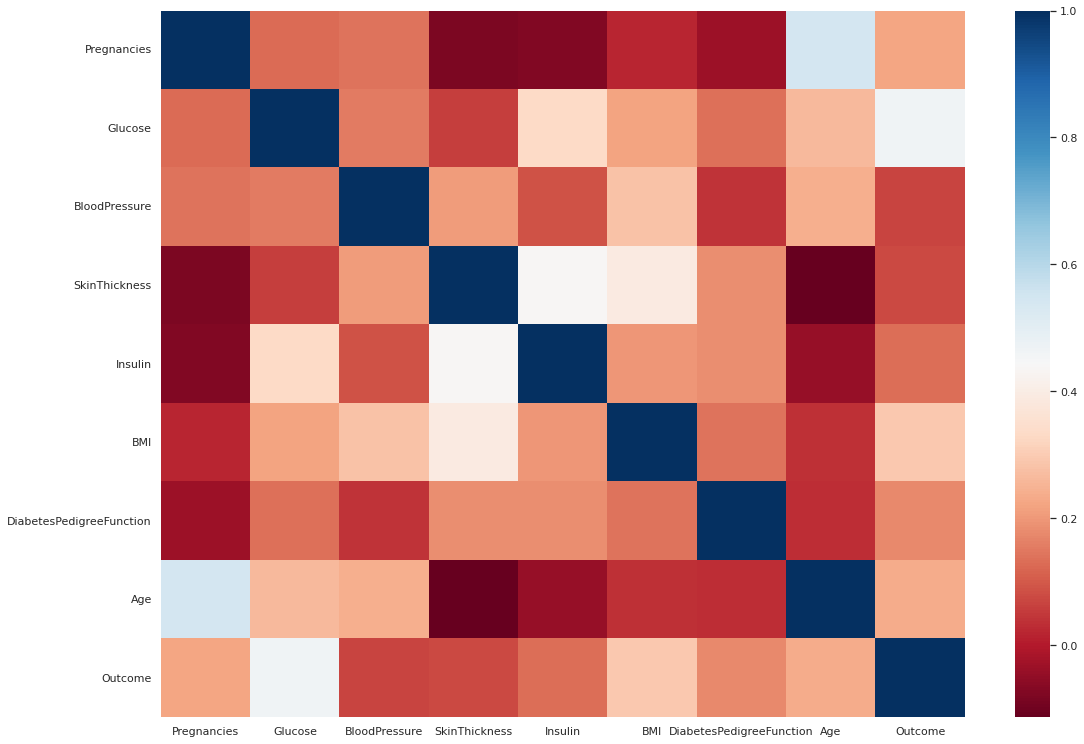

[]

In [19]:
high_correlated_cols(df, plot=True)

## Missing Value Analysis

**Not:** It is known that a human cannot have variable values 0 other than Pregnancies and Outcome. Therefore, an action decision should be taken regarding these values. Values that are 0 can be assigned NaN.


In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
for col in zero_columns:
  df[col] = np.where(df[col]==0, np.nan, df[col])

In [22]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [24]:
na_columns = missing_value_table(df, na_name=True)

               n_miss   ratio
Insulin           374 48.7000
SkinThickness     227 29.5600
BloodPressure      35  4.5600
BMI                11  1.4300
Glucose             5  0.6500


In [25]:
# Examining the Relationship of Missing Values with the Dependent Variable
def missing_vs_target(dataframe, target):
  na_columns = missing_value_table(dataframe, na_name=True)
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        "Count": temp_df.groupby(col)[target].count()}))
    print("##################################################")

In [26]:
missing_vs_target(df, "Outcome")

               n_miss   ratio
Insulin           374 48.7000
SkinThickness     227 29.5600
BloodPressure      35  4.5600
BMI                11  1.4300
Glucose             5  0.6500
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                     0.3486    763
1                     0.4000      5
##################################################
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                           0.3438    733
1                           0.4571     35
##################################################
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                           0.3327    541
1                           0.3877    227
##################################################
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                     0.3299    394
1                     0.3690    374
###########################################

In [27]:
# Assigning a Missing Value
for col in zero_columns:
  df.loc[df[col].isnull(), col] = df[col].median()

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outlier Analysis

In [29]:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [30]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [31]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [32]:
for col in df.columns:
  print(col, check_outlier(df, col))
  if check_outlier(df, col):
    replace_with_thresholds(df, col)

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [33]:
for col in df.columns:
  print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


## Encoding Scaling

In [34]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [35]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [36]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)

In [37]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Outcome"]]
def one_hot_encoding(dataframe, cat_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [38]:
df = one_hot_encoding(df, cat_cols, drop_first=True)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0000,72.0000,35.0000,125.0000,33.6000,0.6270,50,1
1,1,85.0000,66.0000,29.0000,125.0000,26.6000,0.3510,31,0
2,8,183.0000,64.0000,29.0000,125.0000,23.3000,0.6720,32,1
3,1,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21,0
4,0,137.0000,40.0000,35.0000,168.0000,43.1000,2.2880,33,1


# Logistic Regression

📌 The aim is to establish a linear model for the classification problem that describes the relationship between dependent and independent variables.

In [40]:
def Logistic_Regression_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  logistic_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, logistic_model.predict(X_train))
    acc_test = accuracy_score(y_test, logistic_model.predict(X_test))
    r2 = logistic_model.score(X, y)
    r2_train = logistic_model.score(X_train, y_train)
    r2_test = logistic_model.score(X_test, y_test)
    cv_train = cross_val_score(logistic_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(logistic_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, logistic_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, logistic_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, logistic_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, logistic_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    logistic_roc_auc_train = roc_auc_score(y_train, logistic_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % logistic_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % logistic_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    logistic_roc_auc_test = roc_auc_score(y_test, logistic_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % logistic_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % logistic_roc_auc_test )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return logistic_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.765
Accuracy_test:  0.784
R2:  0.771
R2_train:  0.765
R2_test:  0.784
Cross Validation Score(Train):  0.756
Cross Validation Score(Test):  0.766
##################### Confusion Matrix(Train) ######################
[[317  37]
 [ 89  94]]
##################### Confusion Matrix(Test) ######################
[[131  15]
 [ 35  50]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       354
           1       0.72      0.51      0.60       183

    accuracy                           0.77       537
   macro avg       0.75      0.70      0.72       537
weighted avg       0.76      0.77      0.75       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
 

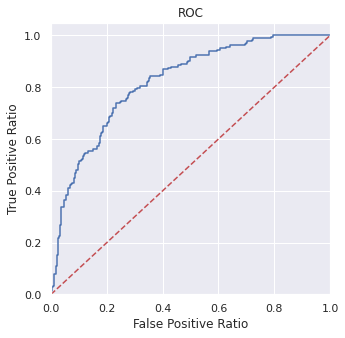

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.743


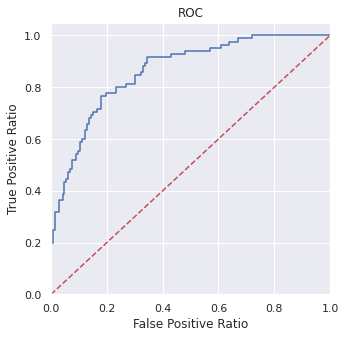

In [41]:
logistic_model = Logistic_Regression_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Naive Bayes

📌 It is a probability-based modeling technique. The aim is to calculate the probability that a particular sample belongs to each class, based on conditional probability.

In [42]:
def Naive_Bayes_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  naive_bayes_model = GaussianNB().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, naive_bayes_model.predict(X_train))
    acc_test = accuracy_score(y_test, naive_bayes_model.predict(X_test))
    r2 = naive_bayes_model.score(X, y)
    r2_train = naive_bayes_model.score(X_train, y_train)
    r2_test = naive_bayes_model.score(X_test, y_test)
    cv_train = cross_val_score(naive_bayes_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(naive_bayes_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, naive_bayes_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, naive_bayes_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, naive_bayes_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, naive_bayes_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    naive_roc_auc_train = roc_auc_score(y_train, naive_bayes_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % naive_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, naive_bayes_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % naive_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    naive_roc_auc_test = roc_auc_score(y_test, naive_bayes_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % naive_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % naive_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return naive_bayes_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.741
Accuracy_test:  0.771
R2:  0.750
R2_train:  0.741
R2_test:  0.771
Cross Validation Score(Train):  0.736
Cross Validation Score(Test):  0.775
##################### Confusion Matrix(Train) ######################
[[293  61]
 [ 78 105]]
##################### Confusion Matrix(Test) ######################
[[123  23]
 [ 30  55]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       354
           1       0.63      0.57      0.60       183

    accuracy                           0.74       537
   macro avg       0.71      0.70      0.70       537
weighted avg       0.74      0.74      0.74       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
 

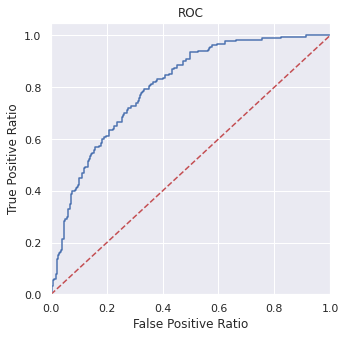

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.745


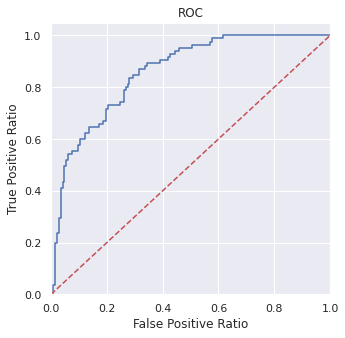

In [43]:
naive_bayes_model = Naive_Bayes_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# k-Nearest Neighbors(KNN)

📌 Predicts are made based on observation similarity

In [44]:
def KNN_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  knn_model = KNeighborsClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, knn_model.predict(X_train))
    acc_test = accuracy_score(y_test, knn_model.predict(X_test))
    r2 = knn_model.score(X, y)
    r2_train = knn_model.score(X_train, y_train)
    r2_test = knn_model.score(X_test, y_test)
    cv_train = cross_val_score(knn_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(knn_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, knn_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, knn_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, knn_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, knn_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    knn_roc_auc_train = roc_auc_score(y_train, knn_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % knn_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, knn_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % knn_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    knn_roc_auc_test = roc_auc_score(y_test, knn_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % knn_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % knn_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return knn_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.784
Accuracy_test:  0.775
R2:  0.781
R2_train:  0.784
R2_test:  0.775
Cross Validation Score(Train):  0.698
Cross Validation Score(Test):  0.736
##################### Confusion Matrix(Train) ######################
[[307  47]
 [ 69 114]]
##################### Confusion Matrix(Test) ######################
[[124  22]
 [ 30  55]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       354
           1       0.71      0.62      0.66       183

    accuracy                           0.78       537
   macro avg       0.76      0.75      0.75       537
weighted avg       0.78      0.78      0.78       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       146
 

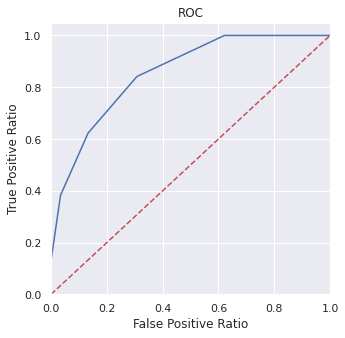

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.748


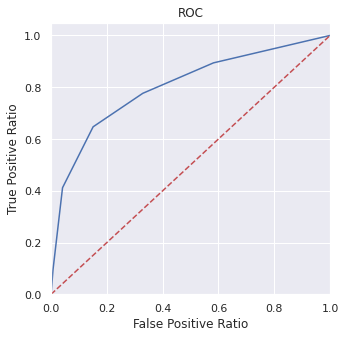

In [45]:
knn_model = KNN_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [46]:
def KNN_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  knn_model = KNeighborsClassifier()
  knn_model_params = {"n_neighbors": np.arange(1,50)}
  knn_cv_model = GridSearchCV(knn_model, knn_model_params, cv=cv).fit(X_train, y_train)
  knn_model_tuned = KNeighborsClassifier(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, knn_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, knn_model_tuned.predict(X_test))
    r2 = knn_model_tuned.score(X, y)
    r2_train = knn_model_tuned.score(X_train, y_train)
    r2_test = knn_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(knn_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(knn_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("KNN Best K Params: ", knn_cv_model.best_params_["n_neighbors"])
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, knn_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, knn_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, knn_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, knn_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    knn_roc_auc_train = roc_auc_score(y_train, knn_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % knn_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, knn_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % knn_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    knn_roc_auc_test = roc_auc_score(y_test, knn_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % knn_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, knn_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % knn_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return knn_model_tuned

##################### Accuracy & R2 Metrics ######################
KNN Best K Params:  47
Accuracy_train:  0.750
Accuracy_test:  0.762
R2:  0.754
R2_train:  0.750
R2_test:  0.762
Cross Validation Score(Train):  0.745
Cross Validation Score(Test):  0.719
##################### Confusion Matrix(Train) ######################
[[314  40]
 [ 94  89]]
##################### Confusion Matrix(Test) ######################
[[130  16]
 [ 39  46]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       354
           1       0.69      0.49      0.57       183

    accuracy                           0.75       537
   macro avg       0.73      0.69      0.70       537
weighted avg       0.74      0.75      0.74       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.77      0.8

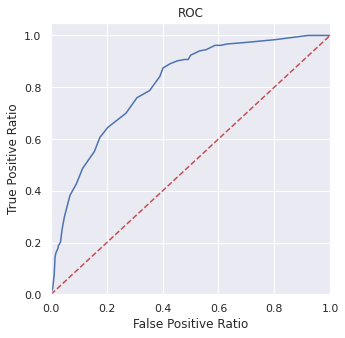

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.716


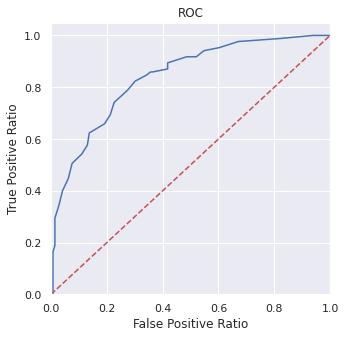

In [47]:
knn_model_tuned = KNN_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Support Vector Classification(SVC)   ===> Linear & RBF

  📌 The goal is to find the hyperplane that will allow the separation between the two classes to be optimal.

In [48]:
def SVC_model(dataframe, target, kernel, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  svc_model = SVC(kernel=kernel, probability=True).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, svc_model.predict(X_train))
    acc_test = accuracy_score(y_test, svc_model.predict(X_test))
    r2 = svc_model.score(X, y)
    r2_train = svc_model.score(X_train, y_train)
    r2_test = svc_model.score(X_test, y_test)
    cv_train = cross_val_score(svc_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(svc_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, svc_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, svc_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, svc_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, svc_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    svc_roc_auc_train = roc_auc_score(y_train, svc_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % svc_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, svc_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % svc_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    svc_roc_auc_test = roc_auc_score(y_test, svc_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % svc_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % svc_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return svc_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.765
Accuracy_test:  0.775
R2:  0.768
R2_train:  0.765
R2_test:  0.775
Cross Validation Score(Train):  0.756
Cross Validation Score(Test):  0.775
##################### Confusion Matrix(Train) ######################
[[312  42]
 [ 84  99]]
##################### Confusion Matrix(Test) ######################
[[132  14]
 [ 38  47]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       354
           1       0.70      0.54      0.61       183

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
 

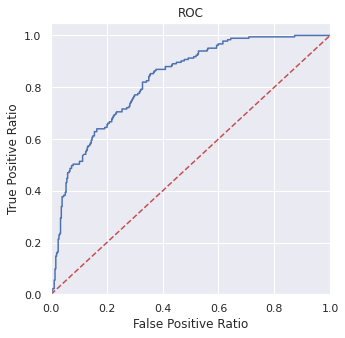

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.729


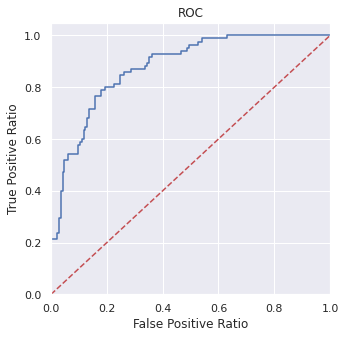

In [49]:
# Kernel = linear
svc_model = SVC_model(df, "Outcome", kernel="linear", results=True, conf_matrix=True, c_report=True, roc=True)

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.756
Accuracy_test:  0.766
R2:  0.759
R2_train:  0.756
R2_test:  0.766
Cross Validation Score(Train):  0.747
Cross Validation Score(Test):  0.714
##################### Confusion Matrix(Train) ######################
[[327  27]
 [104  79]]
##################### Confusion Matrix(Test) ######################
[[138   8]
 [ 46  39]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       354
           1       0.75      0.43      0.55       183

    accuracy                           0.76       537
   macro avg       0.75      0.68      0.69       537
weighted avg       0.75      0.76      0.74       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       146
 

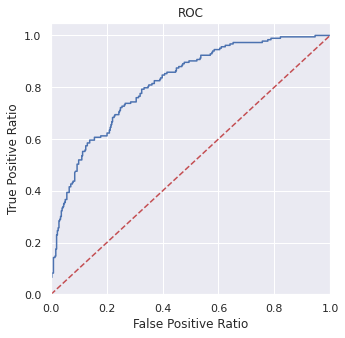

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.702


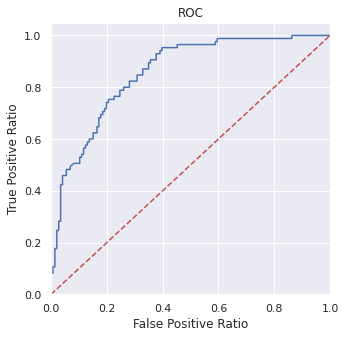

In [50]:
# Kernel = rbf
svc_model = SVC_model(df, "Outcome", kernel="rbf", results=True, conf_matrix=True, c_report=True, roc=True)

In [51]:
def SVC_model_tuning(dataframe, target, kernel, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  svc_model = SVC(kernel=kernel, probability=True)
  if kernel=="linear":
    svc_model_params = {"C": np.arange(1,10)}
    svc_cv_model = GridSearchCV(svc_model, svc_model_params, cv=cv).fit(X_train, y_train)
    svc_model_tuned = SVC(kernel=kernel, probability=True, C=svc_cv_model.best_params_["C"]).fit(X_train, y_train)
  elif kernel=="rbf":
    svc_model_params = {"C": [0.1,0.01,0.001,1,5,10,20,50,100],
                        "gamma": [0.1,0.01,0.001,1,5,10,20,50,100]}
    svc_cv_model = GridSearchCV(svc_model, svc_model_params, cv=cv).fit(X_train, y_train)
    svc_model_tuned = SVC(kernel=kernel, probability=True, C=svc_cv_model.best_params_["C"], gamma=svc_cv_model.best_params_["gamma"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, svc_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, svc_model_tuned.predict(X_test))
    r2 = svc_model_tuned.score(X, y)
    r2_train = svc_model_tuned.score(X_train, y_train)
    r2_test = svc_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(svc_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(svc_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    if kernel=='linear':
      print("SVC Best Params C: ", svc_cv_model.best_params_["C"])
    elif kernel=='rbf':
      print("SVC Best Params: C={0}  gamma={1}".format(svc_cv_model.best_params_["C"],svc_cv_model.best_params_["gamma"]))
    
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, svc_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, svc_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, svc_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, svc_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    svc_roc_auc_train = roc_auc_score(y_train, svc_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % svc_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, svc_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % svc_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    svc_roc_auc_test = roc_auc_score(y_test, svc_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % svc_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, svc_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % svc_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return svc_model_tuned

##################### Accuracy & R2 Metrics ######################
SVC Best Params C:  3
Accuracy_train:  0.767
Accuracy_test:  0.775
R2:  0.770
R2_train:  0.767
R2_test:  0.775
Cross Validation Score(Train):  0.760
Cross Validation Score(Test):  0.771
##################### Confusion Matrix(Train) ######################
[[315  39]
 [ 86  97]]
##################### Confusion Matrix(Test) ######################
[[132  14]
 [ 38  47]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       354
           1       0.71      0.53      0.61       183

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.78      0.90

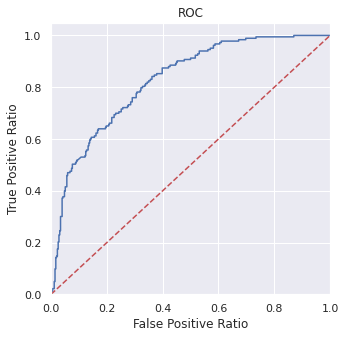

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.729


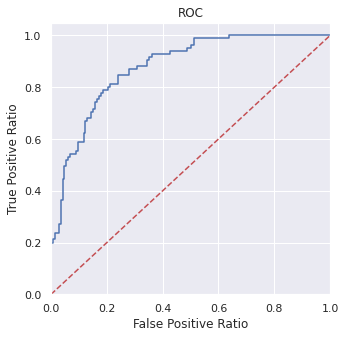

In [52]:
svc_model_tuned = SVC_model_tuning(df, "Outcome", kernel="linear", results=True, conf_matrix=True, c_report=True, roc=True)

##################### Accuracy & R2 Metrics ######################
SVC Best Params: C=1  gamma=0.001
Accuracy_train:  0.827
Accuracy_test:  0.749
R2:  0.803
R2_train:  0.827
R2_test:  0.749
Cross Validation Score(Train):  0.734
Cross Validation Score(Test):  0.697
##################### Confusion Matrix(Train) ######################
[[330  24]
 [ 69 114]]
##################### Confusion Matrix(Test) ######################
[[131  15]
 [ 43  42]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       354
           1       0.83      0.62      0.71       183

    accuracy                           0.83       537
   macro avg       0.83      0.78      0.79       537
weighted avg       0.83      0.83      0.82       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.

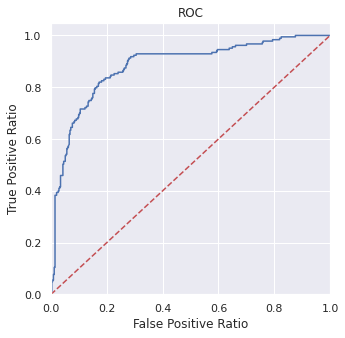

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.696


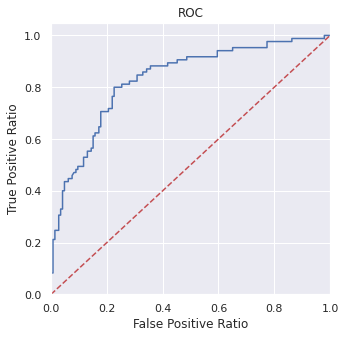

In [53]:
svc_model_tuned = SVC_model_tuning(df, "Outcome", kernel="rbf", results=True, conf_matrix=True, c_report=True, roc=True)

# Artificial Neural Network(ANN)

📌 It is one of the powerful machine learning algorithms that can be used for classification and regression problems that refer to the way the human brain processes information

In [ ]:
def ANN_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  import warnings
  warnings.filterwarnings("ignore")
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)
  ann_model = MLPClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, ann_model.predict(X_train))
    acc_test = accuracy_score(y_test, ann_model.predict(X_test))
    r2 = ann_model.score(X, y)
    r2_train = ann_model.score(X_train, y_train)
    r2_test = ann_model.score(X_test, y_test)
    cv_train = cross_val_score(ann_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(ann_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, ann_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, ann_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, ann_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, ann_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    ann_roc_auc_train = roc_auc_score(y_train, ann_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % ann_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, ann_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % ann_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    ann_roc_auc_test = roc_auc_score(y_test, ann_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % ann_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % ann_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return ann_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.810
Accuracy_test:  0.814
R2:  0.349
R2_train:  0.810
R2_test:  0.814
Cross Validation Score(Train):  0.721
Cross Validation Score(Test):  0.801
##################### Confusion Matrix(Train) ######################
[[314  40]
 [ 62 121]]
##################### Confusion Matrix(Test) ######################
[[135  11]
 [ 32  53]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       354
           1       0.75      0.66      0.70       183

    accuracy                           0.81       537
   macro avg       0.79      0.77      0.78       537
weighted avg       0.81      0.81      0.81       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       146
 

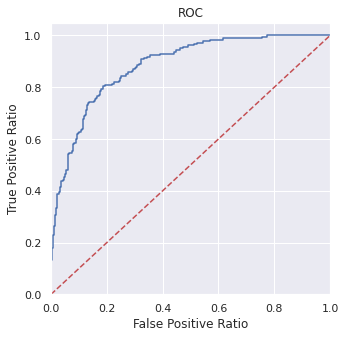

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.774


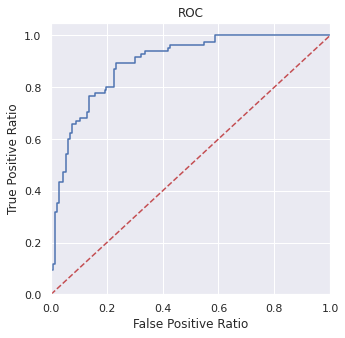

In [55]:
ann_model = ANN_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [ ]:
def ANN_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  import warnings
  warnings.filterwarnings("ignore")
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)
  ann_model = MLPClassifier()
  ann_model_params = {"alpha": [0.1, 0.01, 0.001, 0.2],
                      "hidden_layer_sizes": [(50,50,50), (100,100,100), (200,200,200)],
                      "solver": ["adam","sgd"],
                      "activation": ["relu","logistic"]}
  ann_cv_model = GridSearchCV(ann_model, ann_model_params, cv=cv).fit(X_train, y_train)
  ann_model_tuned = MLPClassifier(alpha=ann_cv_model.best_params_["alpha"],
                                  hidden_layer_sizes=ann_cv_model.best_params_["hidden_layer_sizes"],
                                  solver=ann_cv_model.best_params_["solver"],
                                  activation=ann_cv_model.best_params_["activation"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, ann_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, ann_model_tuned.predict(X_test))
    r2 = ann_model_tuned.score(X, y)
    r2_train = ann_model_tuned.score(X_train, y_train)
    r2_test = ann_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(ann_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(ann_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("ANN Model Best Params: alpha={0}  hidden_layer_sizes={1}  solver={2}  activation={3}".format(ann_cv_model.best_params_["alpha"],
                                                                                                        ann_cv_model.best_params_["hidden_layer_sizes"],
                                                                                                        ann_cv_model.best_params_["solver"],
                                                                                                        ann_cv_model.best_params_["activation"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, ann_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, ann_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, ann_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, ann_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    ann_roc_auc_train = roc_auc_score(y_train, ann_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % ann_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, ann_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % ann_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    ann_roc_auc_test = roc_auc_score(y_test, ann_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % ann_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, ann_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % ann_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return ann_model_tuned

##################### Accuracy & R2 Metrics ######################
ANN Model Best Params: alpha=0.01  hidden_layer_sizes=(100, 100, 100)  solver=sgd  activation=relu
Accuracy_train:  0.764
Accuracy_test:  0.779
R2:  0.349
R2_train:  0.764
R2_test:  0.779
Cross Validation Score(Train):  0.752
Cross Validation Score(Test):  0.770
##################### Confusion Matrix(Train) ######################
[[308  46]
 [ 81 102]]
##################### Confusion Matrix(Test) ######################
[[130  16]
 [ 35  50]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       354
           1       0.69      0.56      0.62       183

    accuracy                           0.76       537
   macro avg       0.74      0.71      0.72       537
weighted avg       0.76      0.76      0.76       537

###################### Classification Report(Test) ######################
           

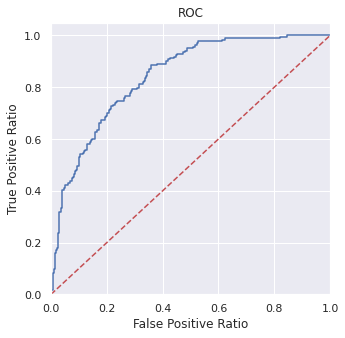

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.739


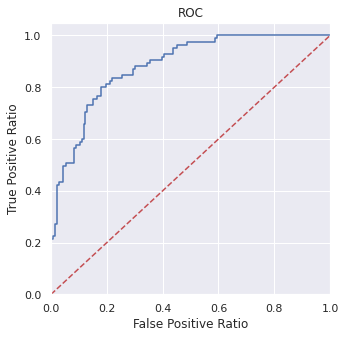

In [86]:
ann_model_tuned = ANN_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Classification and Regression Trees(CART)

📌 The aim is to transform the complex structures in the data set into simple decision structures.

In [87]:
def CART_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False, Decisions=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  cart_model = DecisionTreeClassifier().fit(X_train, y_train)

  if results:
    acc_test = accuracy_score(y_test, cart_model.predict(X_test))
    r2 = cart_model.score(X, y)
    r2_test = cart_model.score(X_test, y_test)
    cv_train = cross_val_score(cart_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(cart_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, cart_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, cart_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Test) ######################")
    cart_roc_auc_test = roc_auc_score(y_test, cart_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % cart_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, cart_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % cart_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  if Decisions:
    !pip install skompiler
    from skompiler import skompile
    print(skompile(cart_model.predict).to("python/code"))

  return cart_model

##################### Accuracy & R2 Metrics ######################
Accuracy_test:  0.706
R2:  0.911
R2_test:  0.706
Cross Validation Score(Train):  0.706
Cross Validation Score(Test):  0.684
##################### Confusion Matrix(Test) ######################
[[118  28]
 [ 40  45]]
###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.669


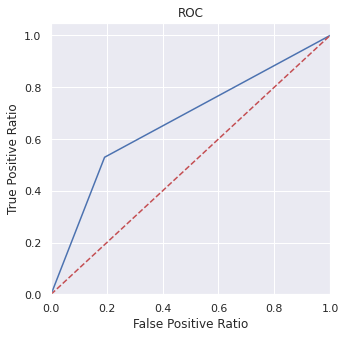

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
((((0 if x[1] <= 104.0 else 1) if x[4] <= 48.5 else 0) if x[5] <= 
    26.300000190734863 else (((0 if x[7] <= 22.5 else 1 if x[4] <= 36.5 else
    0 if x[5] <= 30.449999809265137 else ((0 if x[2] <= 46.0 else 1 if x[5] <=
    41.29999923706055 else 0) if x[2] <= 53.0 else 0 if x[3] <= 28.5 else (
    (0 if x[1] <= 106.5 else ((1 if x[1] <= 122.5 else 0) if x[0] <= 0.5 else
    0) if x[7] <= 24.5 else 1 if x[1] <= 113.0 else 0) if x[5] <= 
    37.85000038146973 else 1) if x[5] <= 38.64999961853027 else 0) if x[6] <=
    1.271500051021576 else 1) if x[0] <= 7.5 else 1) if x[5] <= 
    45.39999961853027 else 1 if x[0] <= 2.5 else 0) if x[7] <= 27.5 else (0 if
    x[0] <= 11.5 else 1) if x[1] <= 89.5 else (((((0 if x[6] <= 
    0.16850000619888306 else 0 if x[7] <= 32.5 else 1) if x[6] <= 
    0.18649999797344208 else 0) if x[6] <= 0.20099999755620956 else ((1 if 
    x[1] <= 127.5 else 1 if

In [88]:
cart_model = CART_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True, Decisions=True)

In [ ]:
def CART_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False, Decisions=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  cart_model = DecisionTreeClassifier()
  cart_model_params = {"max_depth": list(range(1,10)),
                       "min_samples_split": list(range(2,50))}
  cart_cv_model = GridSearchCV(cart_model, cart_model_params, cv=cv).fit(X_train, y_train)
  cart_model_tuned = DecisionTreeClassifier(max_depth=cart_cv_model.best_params_["max_depth"],
                                            min_samples_split=cart_cv_model.best_params_["min_samples_split"]).fit(X_train, y_train)
  

  if results:
    acc_train = accuracy_score(y_train, cart_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, cart_model_tuned.predict(X_test))
    r2 = cart_model_tuned.score(X, y)
    r2_train = cart_model_tuned.score(X_train, y_train)
    r2_test = cart_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(cart_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(cart_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Cart Model Best Params: max_depth={0}  min_samples_split={1}".format(cart_cv_model.best_params_["max_depth"], cart_cv_model.best_params_["min_samples_split"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, cart_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, cart_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, cart_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, cart_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    cart_roc_auc_train = roc_auc_score(y_train, cart_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % cart_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, cart_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % cart_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    cart_roc_auc_test = roc_auc_score(y_test, cart_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % cart_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, cart_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % cart_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  if Decisions:
    !pip install skompiler
    from skompiler import skompile
    print(skompile(cart_model_tuned.predict).to("python/code"))

  return cart_model_tuned

##################### Accuracy & R2 Metrics ######################
Cart Model Best Params: max_depth=5  min_samples_split=5
Accuracy_train:  0.834
Accuracy_test:  0.788
R2:  0.820
R2_train:  0.834
R2_test:  0.788
Cross Validation Score(Train):  0.752
Cross Validation Score(Test):  0.706
##################### Confusion Matrix(Train) ######################
[[319  35]
 [ 54 129]]
##################### Confusion Matrix(Test) ######################
[[130  16]
 [ 33  52]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       354
           1       0.79      0.70      0.74       183

    accuracy                           0.83       537
   macro avg       0.82      0.80      0.81       537
weighted avg       0.83      0.83      0.83       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

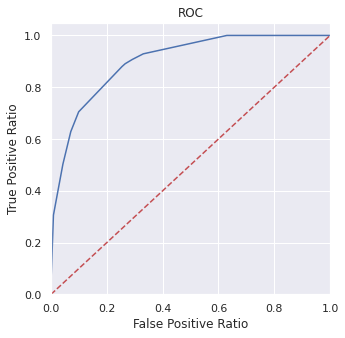

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.751


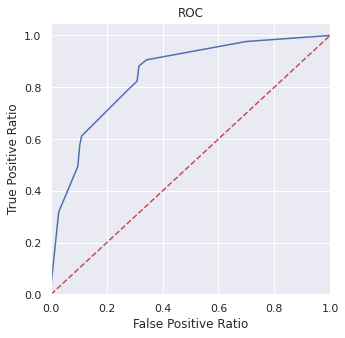

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
((((0 if x[4] <= 47.0 else 1) if x[4] <= 48.5 else 0) if x[5] <= 
    26.300000190734863 else ((0 if x[0] <= 7.5 else 1) if x[5] <= 
    45.39999961853027 else 1) if x[7] <= 27.5 else (0 if x[6] <= 
    0.8024999797344208 else 0) if x[4] <= 111.0 else 0 if x[6] <= 
    0.6200000047683716 else 1) if x[1] <= 129.5 else ((0 if x[7] <= 59.5 else
    0) if x[1] <= 145.5 else 0 if x[5] <= 23.09999942779541 else 1 if x[5] <=
    25.550000190734863 else 0) if x[5] <= 27.850000381469727 else ((1 if x[
    2] <= 73.0 else 0) if x[7] <= 30.5 else 0 if x[3] <= 16.5 else 1) if x[
    1] <= 158.5 else (0 if x[4] <= 86.0 else 1) if x[6] <= 
    1.1565000414848328 else 0 if x[3] <= 40.5 else 1)



In [61]:
cart_model_tuned = CART_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True, Decisions=True)

# Random Forests(RF)

📌 It is based on the evaluation of the predictions produced by multiple decision trees.

In [89]:
def RF_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  rf_model = RandomForestClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, rf_model.predict(X_train))
    acc_test = accuracy_score(y_test, rf_model.predict(X_test))
    r2 = rf_model.score(X, y)
    r2_train = rf_model.score(X_train, y_train)
    r2_test = rf_model.score(X_test, y_test)
    cv_train = cross_val_score(rf_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(rf_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, rf_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, rf_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, rf_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, rf_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    rf_roc_auc_train = roc_auc_score(y_train, rf_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, rf_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % rf_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    rf_roc_auc_test = roc_auc_score(y_test, rf_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % rf_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return rf_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.784
R2:  0.935
R2_train:  1.000
R2_test:  0.784
Cross Validation Score(Train):  0.739
Cross Validation Score(Test):  0.779
##################### Confusion Matrix(Train) ######################
[[354   0]
 [  0 183]]
##################### Confusion Matrix(Test) ######################
[[129  17]
 [ 33  52]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       183

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
 

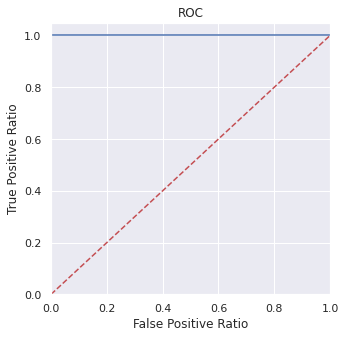

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.748


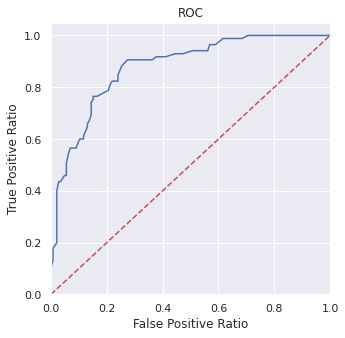

In [90]:
rf_model = RF_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [91]:
def RF_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  rf_model = RandomForestClassifier()
  rf_model_params = {"max_depth": [2,5,8,10],
                     "max_features": [2,5,8],
                     "n_estimators": [500,1000],
                     "min_samples_split": [5,10]}
  rf_cv_model = GridSearchCV(rf_model, rf_model_params, cv=cv).fit(X_train, y_train)
  rf_model_tuned = RandomForestClassifier(max_depth=rf_cv_model.best_params_["max_depth"],
                                          max_features=rf_cv_model.best_params_["max_features"],
                                          n_estimators=rf_cv_model.best_params_["n_estimators"],
                                          min_samples_split=rf_cv_model.best_params_["min_samples_split"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, rf_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, rf_model_tuned.predict(X_test))
    r2 = rf_model_tuned.score(X, y)
    r2_train = rf_model_tuned.score(X_train, y_train)
    r2_test = rf_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(rf_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(rf_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Random Forest Best Params: max_depth={0}  max_features={1}  n_estimators={2}  min_samples_split={3}".format(rf_cv_model.best_params_["max_depth"],
                                                                                                                       rf_cv_model.best_params_["max_features"],
                                                                                                                       rf_cv_model.best_params_["n_estimators"],
                                                                                                                       rf_cv_model.best_params_["min_samples_split"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, rf_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, rf_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, rf_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, rf_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    rf_roc_auc_train = roc_auc_score(y_train, rf_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % rf_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, rf_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % rf_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    rf_roc_auc_test = roc_auc_score(y_test, rf_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % rf_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, rf_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % rf_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return rf_model_tuned

##################### Accuracy & R2 Metrics ######################
Random Forest Best Params: max_depth=8  max_features=8  n_estimators=1000  min_samples_split=10
Accuracy_train:  0.937
Accuracy_test:  0.788
R2:  0.892
R2_train:  0.937
R2_test:  0.788
Cross Validation Score(Train):  0.758
Cross Validation Score(Test):  0.779
##################### Confusion Matrix(Train) ######################
[[346   8]
 [ 26 157]]
##################### Confusion Matrix(Test) ######################
[[129  17]
 [ 32  53]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       354
           1       0.95      0.86      0.90       183

    accuracy                           0.94       537
   macro avg       0.94      0.92      0.93       537
weighted avg       0.94      0.94      0.94       537

###################### Classification Report(Test) ######################
              

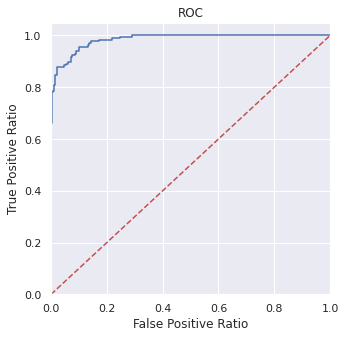

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.754


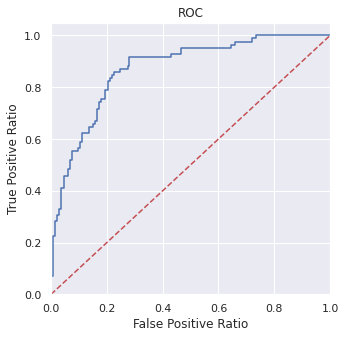

In [92]:
rf_model_tuned = RF_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Gradient Boosting Machines(GBM)

📌 It is a generalized version of AdaBoost that can be easily adapted to classification and regression problems. A series of models in the form of a single predictive model are constructed on the residuals.

In [93]:
def GBM_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, gbm_model.predict(X_train))
    acc_test = accuracy_score(y_test, gbm_model.predict(X_test))
    r2 = gbm_model.score(X, y)
    r2_train = gbm_model.score(X_train, y_train)
    r2_test = gbm_model.score(X_test, y_test)
    cv_train = cross_val_score(gbm_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(gbm_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, gbm_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, gbm_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, gbm_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, gbm_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    gbm_roc_auc_train = roc_auc_score(y_train, gbm_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % gbm_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, gbm_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % gbm_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    gbm_roc_auc_test = roc_auc_score(y_test, gbm_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % gbm_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % gbm_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return gbm_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.926
Accuracy_test:  0.814
R2:  0.892
R2_train:  0.926
R2_test:  0.814
Cross Validation Score(Train):  0.737
Cross Validation Score(Test):  0.779
##################### Confusion Matrix(Train) ######################
[[341  13]
 [ 27 156]]
##################### Confusion Matrix(Test) ######################
[[129  17]
 [ 26  59]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       354
           1       0.92      0.85      0.89       183

    accuracy                           0.93       537
   macro avg       0.92      0.91      0.92       537
weighted avg       0.93      0.93      0.92       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       146
 

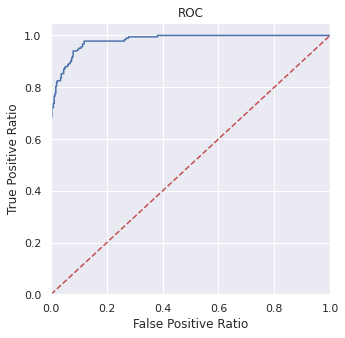

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.789


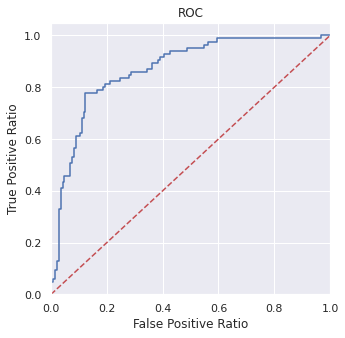

In [94]:
gbm_model = GBM_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [95]:
def GBM_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  gbm_model = GradientBoostingClassifier()
  gbm_model_params = {"learning_rate": [0.1,0.01,0.001],
                      "n_estimators": [100,500,1000],
                      "max_depth": [3,5,10],
                      "min_samples_split": [2,5,10]}
  gbm_cv_model = GridSearchCV(gbm_model, gbm_model_params, cv=cv).fit(X_train, y_train)
  gbm_model_tuned = GradientBoostingClassifier(learning_rate=gbm_cv_model.best_params_["learning_rate"],
                                               n_estimators=gbm_cv_model.best_params_["n_estimators"],
                                               max_depth=gbm_cv_model.best_params_["max_depth"],
                                               min_samples_split=gbm_cv_model.best_params_["min_samples_split"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, gbm_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, gbm_model_tuned.predict(X_test))
    r2 = gbm_model_tuned.score(X, y)
    r2_train = gbm_model_tuned.score(X_train, y_train)
    r2_test = gbm_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(gbm_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(gbm_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("GBM Best Params: learning_rate={0}  n_estimators={1}  max_depth={2}  min_samples_split={3}".format(gbm_cv_model.best_params_["learning_rate"],
                                                                                                              gbm_cv_model.best_params_["n_estimators"],
                                                                                                              gbm_cv_model.best_params_["max_depth"],
                                                                                                              gbm_cv_model.best_params_["min_samples_split"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, gbm_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, gbm_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, gbm_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, gbm_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    gbm_roc_auc_train = roc_auc_score(y_train, gbm_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % gbm_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, gbm_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % gbm_roc_auc_train )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    gbm_roc_auc_test = roc_auc_score(y_test, gbm_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % gbm_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, gbm_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % gbm_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return gbm_model_tuned

##################### Accuracy & R2 Metrics ######################
GBM Best Params: learning_rate=0.01  n_estimators=500  max_depth=5  min_samples_split=5
Accuracy_train:  0.978
Accuracy_test:  0.792
R2:  0.922
R2_train:  0.978
R2_test:  0.792
Cross Validation Score(Train):  0.764
Cross Validation Score(Test):  0.766
##################### Confusion Matrix(Train) ######################
[[352   2]
 [ 10 173]]
##################### Confusion Matrix(Test) ######################
[[127  19]
 [ 29  56]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       354
           1       0.99      0.95      0.97       183

    accuracy                           0.98       537
   macro avg       0.98      0.97      0.97       537
weighted avg       0.98      0.98      0.98       537

###################### Classification Report(Test) ######################
              precisio

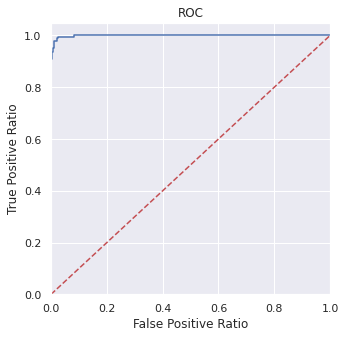

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.764


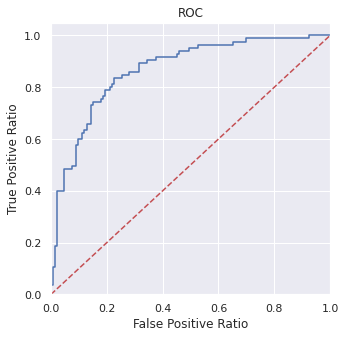

In [96]:
gbm_model_tuned = GBM_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Extreme Gradient Boosting(XGBoost)

📌 XGBoost is optimized to increase the speed and prediction performance of GBM. It is scalable and can be integrated into different platforms.

In [97]:
def XGBoost_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  xgboost_model = XGBClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, xgboost_model.predict(X_train))
    acc_test = accuracy_score(y_test, xgboost_model.predict(X_test))
    r2 = xgboost_model.score(X, y)
    r2_train = xgboost_model.score(X_train, y_train)
    r2_test = xgboost_model.score(X_test, y_test)
    cv_train = cross_val_score(xgboost_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(xgboost_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, xgboost_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, xgboost_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, xgboost_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, xgboost_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    xgboost_roc_auc_train = roc_auc_score(y_train, xgboost_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % xgboost_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, xgboost_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % xgboost_roc_auc_train)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    xgboost_roc_auc_test = roc_auc_score(y_test, xgboost_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % xgboost_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, xgboost_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % xgboost_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return xgboost_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  0.896
Accuracy_test:  0.810
R2:  0.870
R2_train:  0.896
R2_test:  0.810
Cross Validation Score(Train):  0.765
Cross Validation Score(Test):  0.779
##################### Confusion Matrix(Train) ######################
[[332  22]
 [ 34 149]]
##################### Confusion Matrix(Test) ######################
[[130  16]
 [ 28  57]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       354
           1       0.87      0.81      0.84       183

    accuracy                           0.90       537
   macro avg       0.89      0.88      0.88       537
weighted avg       0.89      0.90      0.89       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       146
 

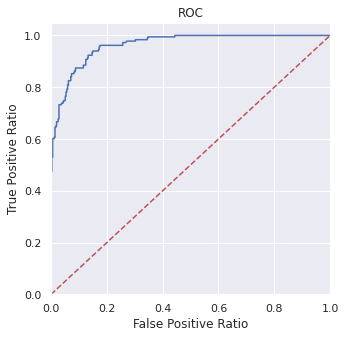

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.780


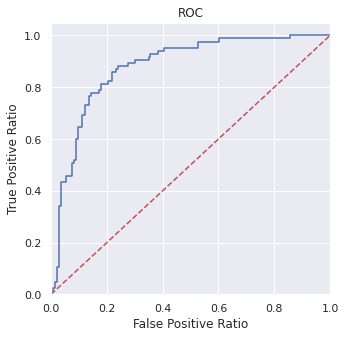

In [98]:
xgboost_model = XGBoost_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [99]:
def XGBoost_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  xgboost_model = XGBClassifier()
  xgboost_model_params = {"n_estimators": [500,1000,2000],
                          "subsample": [0.6,0.8,1],
                          "max_depth": [4,5,6],
                          "learning_rate": [0.1,0.01,0.001],
                          "min_samples_split": [2,5,10]}
  xgboost_cv_model = GridSearchCV(xgboost_model, xgboost_model_params, cv=cv).fit(X_train, y_train)
  xgboost_model_tuned = XGBClassifier(n_estimators=xgboost_cv_model.best_params_["n_estimators"],
                                      subsample=xgboost_cv_model.best_params_["subsample"],
                                      max_depth=xgboost_cv_model.best_params_["max_depth"],
                                      learning_rate=xgboost_cv_model.best_params_["learning_rate"],
                                      min_samples_split=xgboost_cv_model.best_params_["min_samples_split"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, xgboost_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, xgboost_model_tuned.predict(X_test))
    r2 = xgboost_model_tuned.score(X, y)
    r2_train = xgboost_model_tuned.score(X_train, y_train)
    r2_test = xgboost_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(xgboost_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(xgboost_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("XGBoost Best Params: n_estimators={0}  subsample={1}  max_depth={2}  learning_rate={3}  min_samples_split={4}".format(xgboost_cv_model.best_params_["n_estimators"],
                                                                                                                                 xgboost_cv_model.best_params_["subsample"],
                                                                                                                                 xgboost_cv_model.best_params_["max_depth"],
                                                                                                                                 xgboost_cv_model.best_params_["learning_rate"],
                                                                                                                                 xgboost_cv_model.best_params_["min_samples_split"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, xgboost_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, xgboost_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, xgboost_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, xgboost_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    xgboost_roc_auc_train = roc_auc_score(y_train, xgboost_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % xgboost_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, xgboost_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % xgboost_roc_auc_train)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    xgboost_roc_auc_test = roc_auc_score(y_test, xgboost_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % xgboost_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, xgboost_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % xgboost_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return xgboost_model_tuned

##################### Accuracy & R2 Metrics ######################
XGBoost Best Params: n_estimators=500  subsample=1  max_depth=5  learning_rate=0.01  min_samples_split=2
Accuracy_train:  0.927
Accuracy_test:  0.805
R2:  0.891
R2_train:  0.927
R2_test:  0.805
Cross Validation Score(Train):  0.767
Cross Validation Score(Test):  0.771
##################### Confusion Matrix(Train) ######################
[[339  15]
 [ 24 159]]
##################### Confusion Matrix(Test) ######################
[[129  17]
 [ 28  57]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       354
           1       0.91      0.87      0.89       183

    accuracy                           0.93       537
   macro avg       0.92      0.91      0.92       537
weighted avg       0.93      0.93      0.93       537

###################### Classification Report(Test) ######################
     

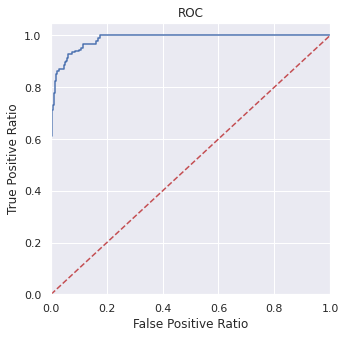

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.777


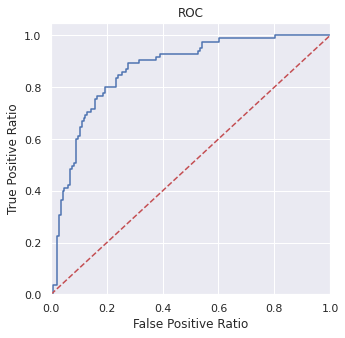

In [100]:
xgboost_model_tuned = XGBoost_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# LightGBM

📌 LightGBM is another type of GBM developed to increase the training time performance of XGBoost.

In [101]:
def LightGBM_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  lightgbm_model = LGBMClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, lightgbm_model.predict(X_train))
    acc_test = accuracy_score(y_test, lightgbm_model.predict(X_test))
    r2 = lightgbm_model.score(X, y)
    r2_train = lightgbm_model.score(X_train, y_train)
    r2_test = lightgbm_model.score(X_test, y_test)
    cv_train = cross_val_score(lightgbm_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(lightgbm_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, lightgbm_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, lightgbm_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, lightgbm_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, lightgbm_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    lightgbm_roc_auc_train = roc_auc_score(y_train, lightgbm_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % lightgbm_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, lightgbm_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % lightgbm_roc_auc_train)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    lightgbm_roc_auc_test = roc_auc_score(y_test, lightgbm_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % lightgbm_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, lightgbm_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % lightgbm_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return lightgbm_model

##################### Accuracy & R2 Metrics ######################
Accuracy_train:  1.000
Accuracy_test:  0.779
R2:  0.934
R2_train:  1.000
R2_test:  0.779
Cross Validation Score(Train):  0.739
Cross Validation Score(Test):  0.749
##################### Confusion Matrix(Train) ######################
[[354   0]
 [  0 183]]
##################### Confusion Matrix(Test) ######################
[[123  23]
 [ 28  57]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       183

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

###################### Classification Report(Test) ######################
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       146
 

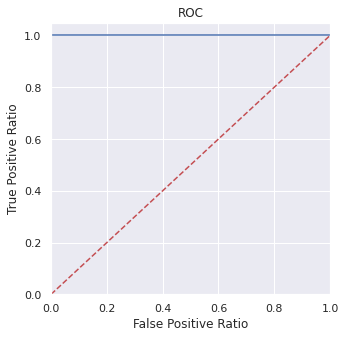

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.757


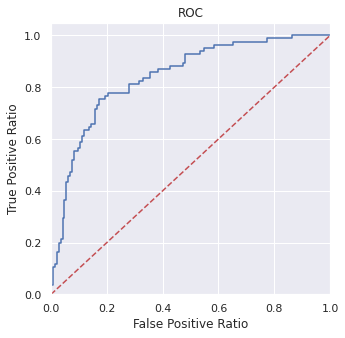

In [102]:
lightgbm_model = LightGBM_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [103]:
def LightGBM_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  lightgbm_model = LGBMClassifier()
  lightgbm_model_params = {"n_estimators": [500,1000,2000],
                          "subsample": [0.6,0.8,1],
                          "max_depth": [4,5,6],
                          "learning_rate": [0.1,0.01,0.001],
                          "min_child_samples": [5,10,20]}
  lightgbm_cv_model = GridSearchCV(lightgbm_model, lightgbm_model_params, cv=cv).fit(X_train, y_train)
  lightgbm_model_tuned = LGBMClassifier(n_estimators=lightgbm_cv_model.best_params_["n_estimators"],
                                      subsample=lightgbm_cv_model.best_params_["subsample"],
                                      max_depth=lightgbm_cv_model.best_params_["max_depth"],
                                      learning_rate=lightgbm_cv_model.best_params_["learning_rate"],
                                      min_child_samples=lightgbm_cv_model.best_params_["min_child_samples"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, lightgbm_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, lightgbm_model_tuned.predict(X_test))
    r2 = lightgbm_model_tuned.score(X, y)
    r2_train = lightgbm_model_tuned.score(X_train, y_train)
    r2_test = lightgbm_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(lightgbm_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(lightgbm_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("LightGBM Best Params: n_estimators={0}  subsample={1}  max_depth={2}  learning_rate={3}  min_child_samples={4}".format(lightgbm_cv_model.best_params_["n_estimators"],
                                                                                                                                 lightgbm_cv_model.best_params_["subsample"],
                                                                                                                                 lightgbm_cv_model.best_params_["max_depth"],
                                                                                                                                 lightgbm_cv_model.best_params_["learning_rate"],
                                                                                                                                 lightgbm_cv_model.best_params_["min_child_samples"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, lightgbm_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, lightgbm_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, lightgbm_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, lightgbm_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    lightgbm_roc_auc_train = roc_auc_score(y_train, lightgbm_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % lightgbm_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, lightgbm_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % lightgbm_roc_auc_train)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    lightgbm_roc_auc_test = roc_auc_score(y_test, lightgbm_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % lightgbm_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, lightgbm_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % lightgbm_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return lightgbm_model_tuned

##################### Accuracy & R2 Metrics ######################
LightGBM Best Params: n_estimators=500  subsample=0.6  max_depth=4  learning_rate=0.01  min_child_samples=5
Accuracy_train:  0.905
Accuracy_test:  0.805
R2:  0.875
R2_train:  0.905
R2_test:  0.805
Cross Validation Score(Train):  0.767
Cross Validation Score(Test):  0.779
##################### Confusion Matrix(Train) ######################
[[336  18]
 [ 33 150]]
##################### Confusion Matrix(Test) ######################
[[129  17]
 [ 28  57]]
###################### Classification Report(Train) ######################
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       354
           1       0.89      0.82      0.85       183

    accuracy                           0.91       537
   macro avg       0.90      0.88      0.89       537
weighted avg       0.90      0.91      0.90       537

###################### Classification Report(Test) ######################
  

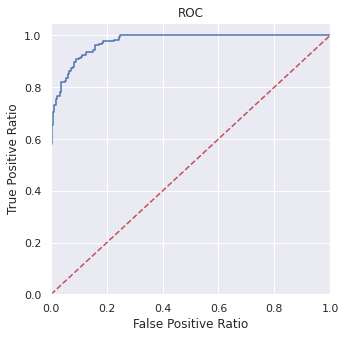

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.777


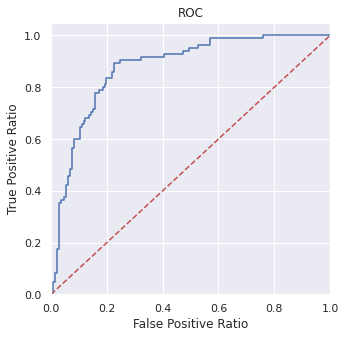

In [104]:
lightgbm_model_tuned = LightGBM_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Category Boosting(CatBoost)

📌 It is another fast, successful type of GBM that can automatically deal with categorical variables.

In [105]:
def CatBoost_model(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  catboost_model = CatBoostClassifier().fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, catboost_model.predict(X_train))
    acc_test = accuracy_score(y_test, catboost_model.predict(X_test))
    r2 = catboost_model.score(X, y)
    r2_train = catboost_model.score(X_train, y_train)
    r2_test = catboost_model.score(X_test, y_test)
    cv_train = cross_val_score(catboost_model, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(catboost_model, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, catboost_model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, catboost_model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, catboost_model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, catboost_model.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    catboost_roc_auc_train = roc_auc_score(y_train, catboost_model.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % catboost_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, catboost_model.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % catboost_roc_auc_train)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    catboost_roc_auc_test = roc_auc_score(y_test, catboost_model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % catboost_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, catboost_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % catboost_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return catboost_model

Görüntülenen çıkış son 5000 satıra kısaltıldı.
40:	learn: 0.5805360	total: 59.1ms	remaining: 1.38s
41:	learn: 0.5782720	total: 60.7ms	remaining: 1.38s
42:	learn: 0.5757419	total: 62.1ms	remaining: 1.38s
43:	learn: 0.5733354	total: 63.6ms	remaining: 1.38s
44:	learn: 0.5706282	total: 65.1ms	remaining: 1.38s
45:	learn: 0.5683192	total: 66.6ms	remaining: 1.38s
46:	learn: 0.5658356	total: 68ms	remaining: 1.38s
47:	learn: 0.5639104	total: 69.5ms	remaining: 1.38s
48:	learn: 0.5616975	total: 70.9ms	remaining: 1.38s
49:	learn: 0.5588869	total: 72.3ms	remaining: 1.37s
50:	learn: 0.5566523	total: 73.6ms	remaining: 1.37s
51:	learn: 0.5546359	total: 75.1ms	remaining: 1.37s
52:	learn: 0.5520935	total: 76.6ms	remaining: 1.37s
53:	learn: 0.5502084	total: 78ms	remaining: 1.36s
54:	learn: 0.5487694	total: 79.6ms	remaining: 1.37s
55:	learn: 0.5462989	total: 81ms	remaining: 1.36s
56:	learn: 0.5445640	total: 82.3ms	remaining: 1.36s
57:	learn: 0.5429275	total: 83.7ms	remaining: 1.36s
58:	learn: 0.5407887	to

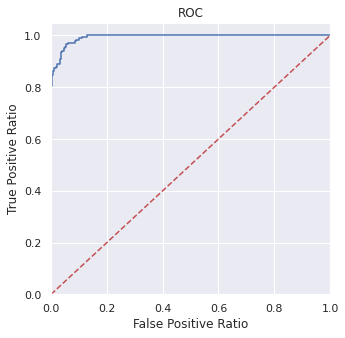

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.760


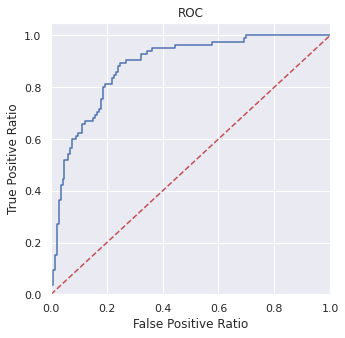

In [106]:
catboost_model = CatBoost_model(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

In [107]:
def CatBoost_model_tuning(dataframe, target, cv=10, results=False, conf_matrix=False, c_report=False, roc=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
  catboost_model = CatBoostClassifier()
  catboost_model_params = {"iterations": [200,500],
                            "learning_rate": [0.1,0.01,0.001],
                            "depth": [3,5,8]}
  catboost_cv_model = GridSearchCV(catboost_model, catboost_model_params, cv=cv).fit(X_train, y_train)
  catboost_model_tuned = CatBoostClassifier(iterations=catboost_cv_model.best_params_["iterations"],
                                            learning_rate=catboost_cv_model.best_params_["learning_rate"],
                                            depth=catboost_cv_model.best_params_["depth"]).fit(X_train, y_train)

  if results:
    acc_train = accuracy_score(y_train, catboost_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, catboost_model_tuned.predict(X_test))
    r2 = catboost_model_tuned.score(X, y)
    r2_train = catboost_model_tuned.score(X_train, y_train)
    r2_test = catboost_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(catboost_model_tuned, X_train, y_train, cv=cv).mean()
    cv_test = cross_val_score(catboost_model_tuned, X_test, y_test, cv=cv).mean()
    print("##################### Accuracy & R2 Metrics ######################")
    print("CatBoost Best Params: iterations={0}  learning_rate={1}  depth={2}".format(catboost_cv_model.best_params_["iterations"],
                                                                                      catboost_cv_model.best_params_["learning_rate"],
                                                                                      catboost_cv_model.best_params_["depth"]))
    print("Accuracy_train: ", "%.3f" % acc_train)
    print("Accuracy_test: ", "%.3f" % acc_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
    print("Cross Validation Score(Train): ", "%.3f" % cv_train)
    print("Cross Validation Score(Test): ", "%.3f" % cv_test)
  
  if conf_matrix:
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, catboost_model_tuned.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, catboost_model_tuned.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, catboost_model_tuned.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, catboost_model_tuned.predict(X_test)))
  
  if roc:
    print("###################### Roc Auc Score(Train) ######################")
    catboost_roc_auc_train = roc_auc_score(y_train, catboost_model_tuned.predict(X_train))
    print("Roc Auc Train: ", "%.3f" % catboost_roc_auc_train)
    fpr, tpr, thresholds = roc_curve(y_train, catboost_model_tuned.predict_proba(X_train)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % catboost_roc_auc_train)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

    print("###################### Roc Auc Score(Test) ######################")
    catboost_roc_auc_test = roc_auc_score(y_test, catboost_model_tuned.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % catboost_roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, catboost_model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % catboost_roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

  return catboost_model_tuned

Görüntülenen çıkış son 5000 satıra kısaltıldı.
37:	learn: 0.6685814	total: 121ms	remaining: 1.48s
38:	learn: 0.6678992	total: 124ms	remaining: 1.47s
39:	learn: 0.6672338	total: 127ms	remaining: 1.47s
40:	learn: 0.6666152	total: 131ms	remaining: 1.47s
41:	learn: 0.6658858	total: 134ms	remaining: 1.46s
42:	learn: 0.6653051	total: 137ms	remaining: 1.46s
43:	learn: 0.6647558	total: 140ms	remaining: 1.45s
44:	learn: 0.6640123	total: 143ms	remaining: 1.45s
45:	learn: 0.6633665	total: 146ms	remaining: 1.44s
46:	learn: 0.6627800	total: 149ms	remaining: 1.43s
47:	learn: 0.6622384	total: 152ms	remaining: 1.43s
48:	learn: 0.6616424	total: 155ms	remaining: 1.43s
49:	learn: 0.6609818	total: 158ms	remaining: 1.42s
50:	learn: 0.6603529	total: 161ms	remaining: 1.42s
51:	learn: 0.6596976	total: 164ms	remaining: 1.41s
52:	learn: 0.6591093	total: 167ms	remaining: 1.41s
53:	learn: 0.6585138	total: 170ms	remaining: 1.4s
54:	learn: 0.6577295	total: 173ms	remaining: 1.4s
55:	learn: 0.6571341	total: 176ms	rem

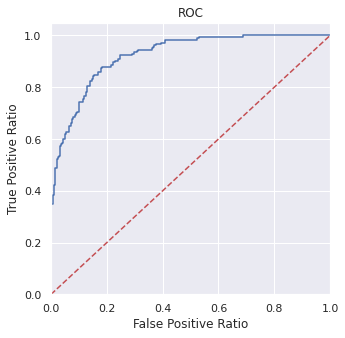

###################### Roc Auc Score(Test) ######################
Roc Auc Test:  0.737


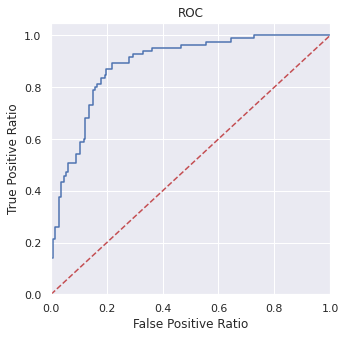

In [108]:
catboost_model_tuned = CatBoost_model_tuning(df, "Outcome", results=True, conf_matrix=True, c_report=True, roc=True)

# Comparison of All Models

In [124]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
models = [
    logistic_model,
    naive_bayes_model,
    knn_model_tuned,
    svc_model_tuned,
    ann_model_tuned,
    cart_model_tuned,
    rf_model_tuned,
    gbm_model_tuned,
    xgboost_model_tuned,
    lightgbm_model_tuned,
    catboost_model_tuned
]

for model in models:
    model_names = model.__class__.__name__
    if model_names=="MLPClassifier":
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.fit_transform(X_test)
      y_pred = model.predict(X_test_scaled)
      Acc = accuracy_score(y_test, y_pred)
      print("-"*28)
      print(model_names + ":" )
      print("Accuracy: {:.4%}".format(Acc))
    else:
      y_pred = model.predict(X_test)
      Acc = accuracy_score(y_test, y_pred)
      print("-"*28)
      print(model_names + ":" )
      print("Accuracy: {:.4%}".format(Acc))

----------------------------
LogisticRegression:
Accuracy: 78.3550%
----------------------------
GaussianNB:
Accuracy: 77.0563%
----------------------------
KNeighborsClassifier:
Accuracy: 76.1905%
----------------------------
SVC:
Accuracy: 74.8918%
----------------------------
MLPClassifier:
Accuracy: 77.9221%
----------------------------
DecisionTreeClassifier:
Accuracy: 78.7879%
----------------------------
RandomForestClassifier:
Accuracy: 78.7879%
----------------------------
GradientBoostingClassifier:
Accuracy: 79.2208%
----------------------------
XGBClassifier:
Accuracy: 80.5195%
----------------------------
LGBMClassifier:
Accuracy: 80.5195%
----------------------------
CatBoostClassifier:
Accuracy: 77.9221%


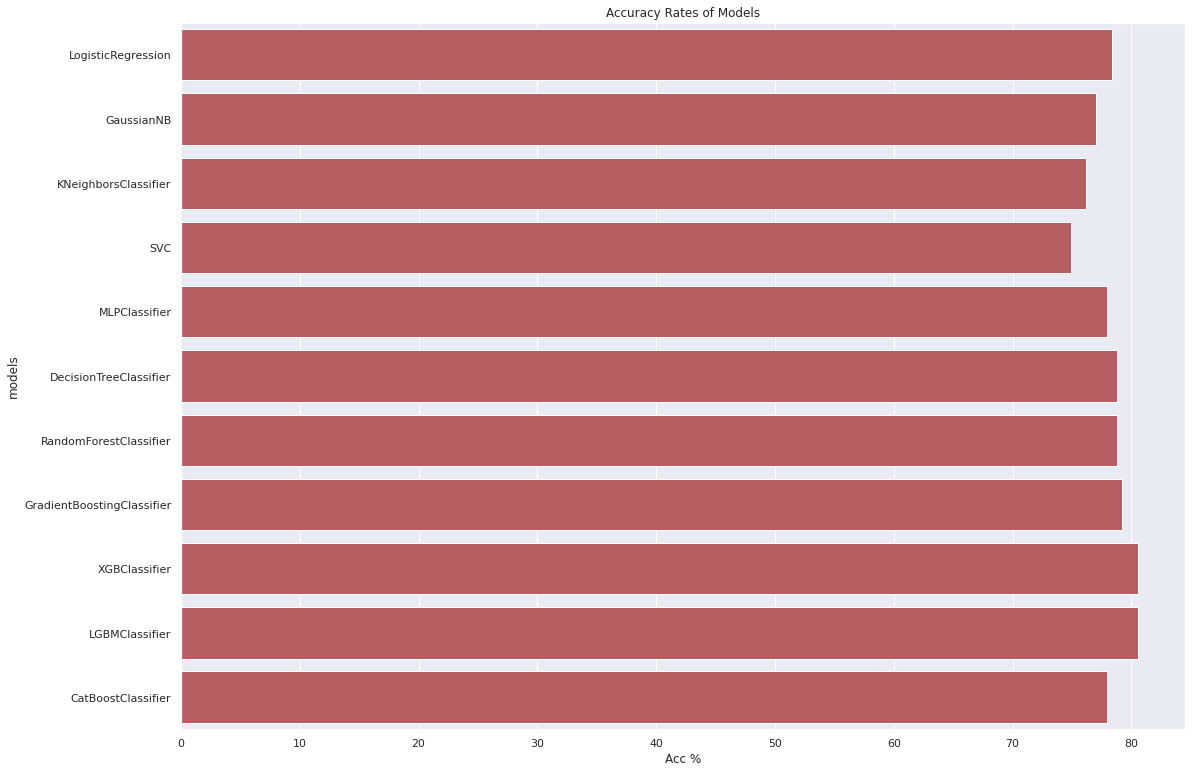

In [127]:
result = []

results = pd.DataFrame(columns= ["models","ACC"])

for model in models:
    model_names = model.__class__.__name__
    if model_names=="MLPClassifier":
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.fit_transform(X_test)
      y_pred = model.predict(X_test_scaled)
      Acc = accuracy_score(y_test, y_pred)
    else:
      y_pred = model.predict(X_test)
      Acc = accuracy_score(y_test, y_pred)

    result = pd.DataFrame([[model_names, Acc*100]], columns= ["models","Acc"])
    results = results.append(result)
    
    
sns.barplot(x= 'Acc', y = 'models', data=results, color="r")
plt.xlabel('Acc %')
plt.title('Accuracy Rates of Models');    